<center> <h1> Mathematical Models: Designing a Roller Coaster </h1> </center>
 
## Overview

In this lab, we will apply our knowledge of Calculus to solve a real-world problem. 

### Important Sage Commands Introduced in this Lab

\begin{array}{|l|l|l|}
\hline 
\hfill \textbf{Command} \hfill & \hfill \textbf{Description} \hfill & \hfill \textbf{Example} \hfill \\
\hline
\textbf{piecewise}([(\textit{domain 1}, \textit{function 1}), \dots]) & \text{Creates a piecewise-defined function} & F = \textbf{piecewise}([((-\textit{infinity},0), x), ([0,0], x), ((0,\textit{infinity}), x^2))\\
\hline
F\textbf{.critical_points()} & \text{Finds the critical points of a}  & F\textbf{.critical_points()} \\
 & \text{$\textbf{piecewise-defined}$ function} & \\
\hline
\end{array}

### Related Course Material
    Graphs, piecewise-defined functions, and properties of the first derivative.

## The Problem: Designing a Roller Coaster

Suppose we are asked to design a simple ascent and drop roller coaster with an overall horizontal displacement of 200 feet. By studying pictures of our favorite roller coasters, we decide that our roller coater should begin the ascent along a line $y = f_1(x)$ of slope 1.5 for the first 20 ft horizontally. Next, it should continue the ascent and then begin the drop along a parabola $y = f_2(x) = ax^2 + bx + c$ for the next 100 ft horizontally. Finally, we want it to begin a soft landing at 30 ft above the ground along a cubic $y = f_3(x) = dx^3 + ex^2 + fx + g$ for the last 80 ft. The main task is to find $\{a,b,c,d,e,f,g\}$ that will ensure that the track is smooth at each transition point. We also would like to know the maximum height of the roller coaster.

We will begin by creating our functions. If we choose the origin as our starting point, then we know that $f_1(x) = 1.5x$ since it is a line with slope 1.5 that passes through $(0,0).$

In [1]:
var('a','b','c','d','e','f','g')
def f1(x):
    return 1.5*x
def f2(x):
    return a*x^2 + b*x + c
def f3(x):
    return d*x^3 + e*x^2 + f*x + g

Since our roller coaster consists of three curves, it can be set up as a piecewise-defined function: $$F(x) = \left \{ \begin{array}{ll} f_1(x) & 0 \leq x \leq 20 \\ f_2(x) & 20 < x \leq 120 \\ f_3(x) & 120 < x \leq 200 \end{array} \right. .$$ 

Before we create the function $F(x)$ in Sage, we need to determine the values of $\{a,b,c,d,e,f,g\}$. In order for our track to be connected, we need to make sure that $F(x)$ is continuous. Therefore, we need to make sure that $f_1(20) = f_2(20)$ and $f_2(120) = f_3(120)$. 

In [2]:
eq1 = f1(20) == f2(20)
eq2 = f2(120) == f3(120)

In order for our track to be smooth, we cannot have abrupt changes in direction, so the first derivative $F'(x)$ needs to be continuous. Therefore, we need to guarantee that $f_1'(20) = f_2'(20)$ and $f_2'(120) = f_3'(120).$

In [3]:
df1(x) = diff(f1(x),x)
df2(x) = diff(f2(x),x)
df3(x) = diff(f3(x),x)
eq3 = df1(20) == df2(20)
eq4 = df2(120) == df3(120)

Since we want our roller coaster to begin a soft landing when it has traveled 120 ft horizonatally and is at a height of 30 ft, we need $f_3(120) = 30.$

In [4]:
eq5 = f3(120) == 30

Finally, in order to have a soft landing, the track should be tangent to the ground at the end of the track.

In [5]:
eq6 = f3(200) == 0
eq7 = df3(200) == 0

We now have a system of 7 equations in 7 unknowns which we can solve using the $\textbf{solve}(\cdots)$ command.

In [6]:
show(solve([eq1, eq2, eq3, eq4, eq5, eq6, eq7], a,b,c,d,e,f,g))

[[a == (-3/200), b == (21/10), c == -6, d == (-3/25600), e == (21/320), f == (-195/16), g == 750]]

We have found the values for $\{a,b,c,d,e,f,g\}$ so that our roller coaster is smooth at each transition point.

In [7]:
a = -3/200
b = 21/10
c = -6
d = -3/25600
e = 21/320
f = -195/16
g = 750

Now that we have determined the values of $\{a,b,c,d,e,f,g\}$, we will create $F(x)$ in Sage using the $\textbf{piecewise}([(\textit{domain 1}, \textit{function 1}), \dots])$ and then plot our roller coaster.

Note: For syntax reasons, Sage will only except intervals of the form $(x_1,x_2)$ and $[x_1,x_2]$. So, in order to specify a function on the domain $(x_1, x_2],$ we will have to use the interval $(x_1, x_2)$ and the interval $[x_2, x_2]$, which is simply the set consisting of only the point $x_2$.

In [8]:
F = piecewise([([0,20], f1(x)), ((20,120), f2(x)), ([120, 120], f2(x)), ((120, 200), f3(x)), ([200, 200], f3(x))])

Now that we have created $F(x)$, we plot it.

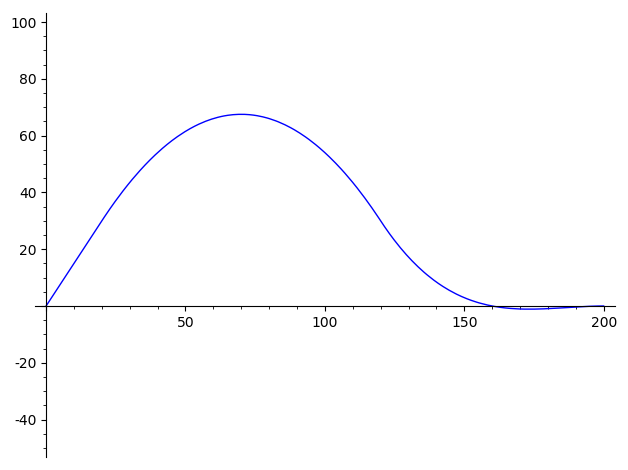

In [9]:
plot(F(x), xmin = 0, xmax = 200, ymin = -50, ymax = 100)

We now want to find the maximum height of the roller coaster. Recall that absolute maxima can only occur at endpoints and critical points. We can find the critical points of a piecewise-defined function in Sage by using the $\textbf{.critical_points()}$ command. 

Caution: The $\textbf{diff}()$ command does not work correctly on piecewise functions in Sage.

In [10]:
F.critical_points()

[70.0, 173.3333333333334, 199.9999999999999]

It follows that the maximum height of the roller coaster could occur at the $x$-values $0, 70, \frac{520}{3},$ and $200$. From the graph, we can see that the maximum occurs at $x = 70.$ 

In [11]:
F(70.0)

67.5000000000000

Therefore, the maximum height of the roller coaster is 67.5 ft.

## Assignment / Project

This week's assignment is a project to design a larger roller coaster and to prepare a neat and complete project report as specified on the course website. The due date will be specified by your TA.